In [1]:
import cv2
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import datasets
from skimage.feature import hog

In [2]:
import tkinter as tk
import tkinter.font as tkfont
from PIL import Image, ImageTk

In [3]:
# Loading The Dataset

dataset = datasets.fetch_openml('mnist_784')

In [4]:
# Separating out the features & labels for fitting the ML model

features = np.array(dataset["data"],'int16')
labels = np.array(dataset["target"],'int')

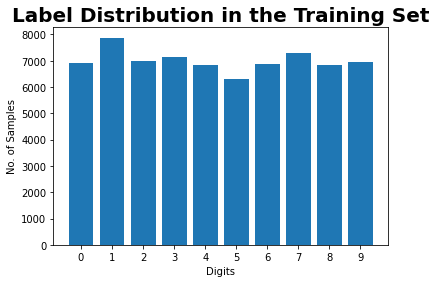

<Figure size 7500x7500 with 0 Axes>

In [5]:
# Visualisation of the training data set
# The distribution of labels for classification should be balanced for accurate predictions

digits, counts = np.unique(labels,return_counts=True)

chart = plt.bar(digits,counts)
plt.xticks([0,1,2,3,4,5,6,7,8,9])
plt.ylabel("No. of Samples")
plt.xlabel("Digits")
plt.title("Label Distribution in the Training Set",fontdict={'fontsize' : 20, 'fontweight' : 'bold'})
plt.figure(figsize=(25,25),edgecolor='red',dpi=300)
plt.show()

In [6]:
# Extracting the HOG features of the images in the training set for fitting into the model

hog_list = []
for feature in features:
    item = hog(feature.reshape(28,28),orientations=9,pixels_per_cell=(14,14),cells_per_block=(1,1),visualize=False)
    hog_list.append(item)
hog_description = np.array(hog_list,'float64')

In [7]:
# Fitting the training dataset into a Support Vector Classifier

svm = SVC(kernel='rbf')
svm.fit(hog_description,labels)

SVC()

In [8]:
def output_func(jpg_name):
    image = cv2.imread(jpg_name)
    #cv2.imshow("Test Image",image)
    #cv2.waitKey()

    gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    gray_image = cv2.GaussianBlur(gray_image, (5,5), 0)
    thresh_return, image_thresh = cv2.threshold(gray_image, 100, 255, cv2.THRESH_BINARY_INV)
    contours, cont_return = cv2.findContours(image_thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    rectangles = [cv2.boundingRect(cntr) for cntr in contours]
    #cv2.imshow("Image After Pre-Processing",image_thresh)
    #cv2.waitKey()

    for rect in rectangles:
        cv2.rectangle(image, (rect[0],rect[1]), (rect[0]+rect[2], rect[1]+rect[3]), (0,255,0), thickness=3)

        pred_image = image_thresh
        pred_image = cv2.resize(pred_image, (28,28), interpolation=cv2.INTER_AREA)
        pred_image = cv2.dilate(pred_image, (3,3))

        hog_pred = hog(pred_image, orientations=9, pixels_per_cell=(14,14), cells_per_block=(1,1), visualize=False)
        prediction = svm.predict(np.array([hog_pred], 'float64'))

        cv2.putText(image, str(int(prediction[0])), (rect[0],rect[1]), cv2.FONT_HERSHEY_DUPLEX, 2, (255,0,0), thickness=3)

    #cv2.imshow("Image with Digit Predictions", image)
    cv2.imwrite("Output_Img.png",image)
    #cv2.waitKey()

In [12]:
root = tk.Toplevel()
#root = tk.Tk(screenName= "Handwritten Digit Detector")

main_canvas = tk.Canvas(root, width = 600, height = 500, bg= "black")
main_canvas.pack()

pic_file = Image.open("images/GUI_Background.jpg")
background_image = ImageTk.PhotoImage(pic_file)
background_label = tk.Label(main_canvas,image= background_image)
background_label.image = background_image
background_label.place(x= 0, y= 0)

heading_frame = tk.Frame(main_canvas, bd= 0, bg= "black")
heading_frame.place(relheight= 0.3, relwidth= 0.8, relx= 0.1)

background_label2 = tk.Label(heading_frame,image= background_image)
background_label2.place(x= 0, y= 0)

heading_font = tkfont.Font(family= "Times New Roman", size= 20, weight= "bold")
main_heading = tk.Label(heading_frame, text= "Welcome to Handwritten Digit Detector", fg= "white", bg= "black", font= heading_font, pady= 3)
main_heading.pack()

subhead_font = tkfont.Font(family= "Times New Roman", size= 17)
sub_heading = tk.Label(heading_frame, text= "Developed By: Kushagra Singh", fg= "white", bg= "black", font= subhead_font)
sub_heading.pack()

text1_font = tkfont.Font(family= "Times New Roman", size= 16)
text1 = tk.Label(heading_frame, text= "Enter the Name of .jpg File:", fg= "white", font= text1_font, bg= 'black', bd= 5)
text1.place(anchor= "nw", y= 113)

def input_func(entry_bar):
    #print(entry_bar)
    output_func(entry_bar)

    pic_file2 = Image.open("Output_Img.png")
    pic_file2 = pic_file2.resize((425,300))
    output_image = ImageTk.PhotoImage(pic_file2)
    output_label = tk.Label(output_frame, image= output_image)
    output_label.image = output_image
    output_label.pack()

entry_font = tkfont.Font(family= "Arial", size= 15)
entry_bar = tk.Entry(heading_frame, bd= 5, font= entry_font, width= 20, relief= "sunken")
entry_bar.place(anchor= "nw", y= 111, x= 236)

input_button = tk.Button(heading_frame, text= "Enter", bd= 5, font= 2, pady= 3, relief= "raised", height= 1, command= lambda: input_func(entry_bar.get()))
input_button.place(anchor= "nw", y= 105, x= 410)

output_frame = tk.Frame(main_canvas, bg= "black")
output_frame.place(anchor= "nw", relheight= 0.5, relwidth= 0.7, y= 200, x= 90)

root.mainloop()